<a href="https://www.kaggle.com/code/chenxinghaooooo/yolo-v7-20221222?scriptVersionId=114742673" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**這篇主要是透過YOLO V7來辨識車輛圖片中的輪胎位置和預測值**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

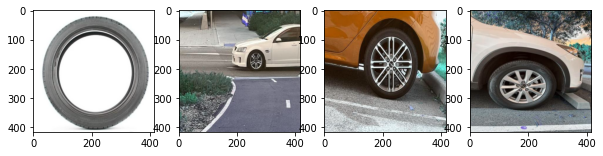

In [2]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("../input/sptire/train/images/14_19_l_jpg.rf.8323d9f848377e32ca451017a3a80731.jpg")
ax[0].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0719_JPEG.rf.05f197445c4a42854e0b1f308fb4e636.jpg")
ax[1].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0680_JPEG.rf.560c49e01182db8356989ddc604557fb.jpg")
ax[2].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0701_JPEG.rf.d5ae66ab383142ef5d59b0454a19fdce.jpg")
ax[3].imshow(image)
fig.show()

In [3]:
%cd ../
!mkdir tmp
%cd tmp

/kaggle
/kaggle/tmp


**下載YOLO V7**

In [4]:
# Download YOLOv7
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1094, done.
remote: Total 1094 (delta 0), reused 0 (delta 0), pack-reused 1094
Receiving objects: 100% (1094/1094), 69.89 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (517/517), done.
/kaggle/tmp/yolov7
Note: you may need to restart the kernel to use updated packages.
/kaggle/tmp
Setup complete. Using torch 1.11.0 (Tesla P100-PCIE-16GB)


In [5]:
%cp -r ../input/sptire /kaggle/tmp

**創建yaml file**

In [6]:

import yaml

data_yaml = dict(
    train = '../sptire/train',
    val = '../sptire/valid',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [7]:
%cd yolov7

/kaggle/tmp/yolov7


**透過YOLO V7進行訓練**

In [8]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml  --weights 'yolov7.pt'

W&B disabled.
100%|██████████████████████████████████████| 72.1M/72.1M [00:02<00:00, 27.4MB/s]

/opt/conda/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:2227.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
train: Scanning '../sptire/train/labels' images and labels... 350 found, 0 missi
val: Scanning '../sptire/valid/labels' images and labels... 100 found, 0 missing

autoanchor: Analyzing anchors... anchors/target = 5.07, Best Possible Recall (BPR) = 1.0000
      0/49      4.6G   0.07587  0.009887         0   0.08576        50       416
               Class      Images      Labels           P           R      mAP@.5
                 all         100         104      0.0815       0.173      0.0305     0.00512
      1/49      5.2G   0.06701  0.009538         0   0.07654  

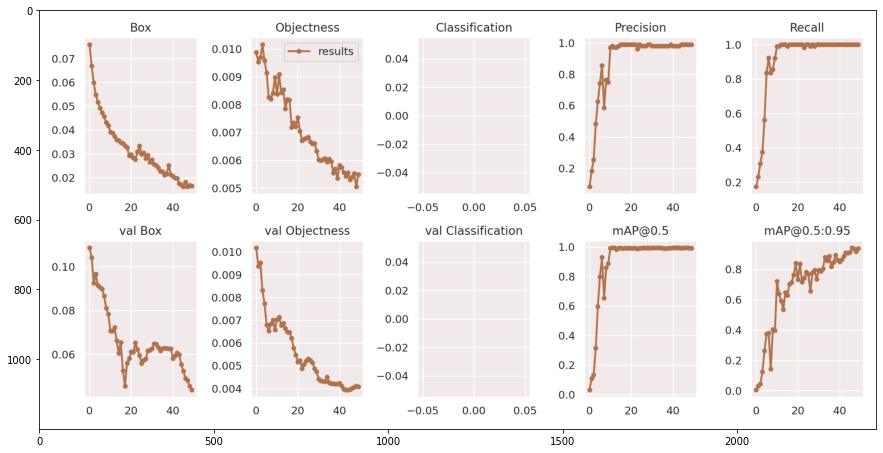

In [9]:
img = cv.imread("runs/train/exp/results.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)

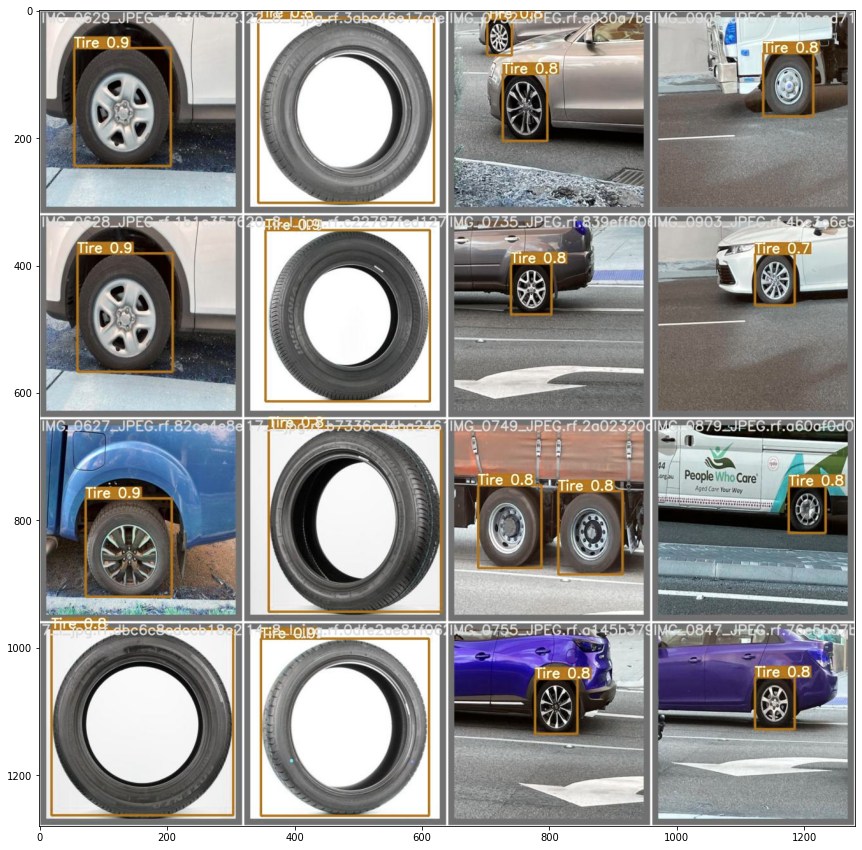

In [10]:
img = cv.imread("runs/train/exp/test_batch2_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [11]:
!python detect.py --source ../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg --weights runs/train/exp/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/opt/conda/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:2227.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 Tire, Done. (25.8ms) Inference, (1.2ms) NMS
 The image with the result is saved in: r

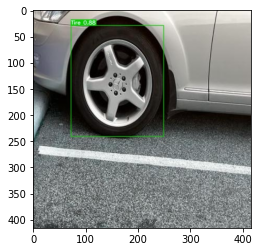

In [12]:
img = cv.imread("runs/detect/exp/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg")
plt.imshow(img)